In [380]:
import numpy as np
from numpy import genfromtxt

from sklearn.preprocessing import MinMaxScaler, StandardScaler

import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import GPy

In [381]:
# loading the data.
path = r"C:\Users\mikep\Desktop\project\data\final"

Xtrain = genfromtxt(path+"\Xtrain.csv", delimiter=',', skip_header=1)
Xtest = genfromtxt(path+"\Xtest.csv", delimiter=',', skip_header=1)

Ytrain = genfromtxt(path+"\Ytrain.csv", delimiter=',', skip_header=1)
Ytest = genfromtxt(path+"\Ytest.csv", delimiter=',', skip_header=1)

Ytrain = np.array([Ytrain]).T
Ytest = np.array([Ytest]).T

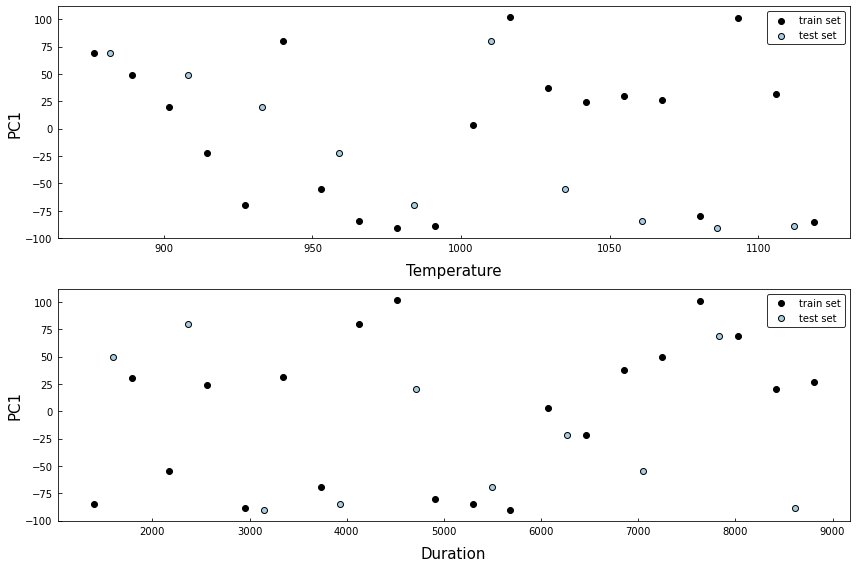

In [382]:
# visualizing the initial data

#plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(2, figsize=(12, 8))

ax[0].scatter(x = Xtrain[:,0], y = Ytrain, marker='o', c='black', edgecolor='black', label='train set')
ax[0].scatter(x = Xtest[:,0], y = Ytest, marker='o', c='#a6cee3', edgecolor='black', label='test set')

ax[0].set_xlabel("Temperature", fontsize=15, labelpad=10, horizontalalignment='center')
ax[0].set_ylabel("PC1", fontsize=15, labelpad=3, horizontalalignment='center')

ax[0].tick_params(axis='both', which='both', labelsize=10, direction="in", pad=5)
#ax[0].tick_params(labelbottom=False, size=4, )

ax[0].legend(loc='best', fontsize=10, edgecolor='black')

###====###

ax[1].scatter(x = Xtrain[:,1], y = Ytrain, marker='o', c='black', edgecolor='black', label='train set')
ax[1].scatter(x = Xtest[:,1], y = Ytest, marker='o', c='#a6cee3', edgecolor='black', label='test set')

ax[1].set_xlabel("Duration", fontsize=15, labelpad=10, horizontalalignment='center')
ax[1].set_ylabel("PC1", fontsize=15, labelpad=3, horizontalalignment='center')

ax[1].tick_params(axis='both', which='both', labelsize=10, direction="in", pad=5)

ax[1].legend(loc='best', fontsize=10, edgecolor='black')

###====###

plt.tight_layout()
#fig.savefig(r"C:\Users\mikep\Desktop\thesis\figures\data-visualization.png", facecolor='w', dpi=600)
plt.show()

In [383]:
# normalizing the input data /// standardizing the output data
norm_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

Xtrain = norm_scaler.fit_transform(Xtrain)
Xtest = norm_scaler.transform(Xtest)

Ytrain = standard_scaler.fit_transform(Ytrain)
Ytest = standard_scaler.transform(Ytest)

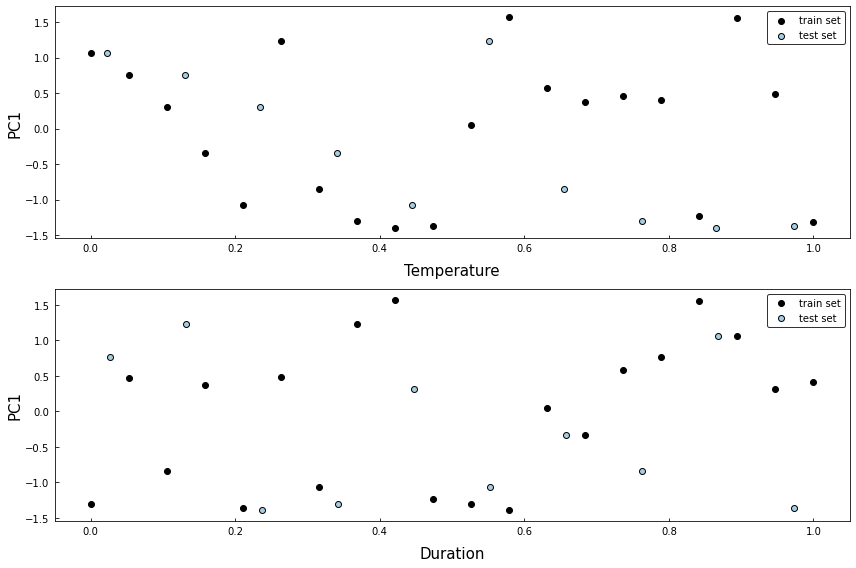

In [384]:
# visualizing the data

#plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(2, figsize=(12, 8))

ax[0].scatter(x = Xtrain[:,0], y = Ytrain, marker='o', c='black', edgecolor='black', label='train set')
ax[0].scatter(x = Xtest[:,0], y = Ytest, marker='o', c='#a6cee3', edgecolor='black', label='test set')

ax[0].set_xlabel("Temperature", fontsize=15, labelpad=10, horizontalalignment='center')
ax[0].set_ylabel("PC1", fontsize=15, labelpad=3, horizontalalignment='center')

ax[0].tick_params(axis='both', which='both', labelsize=10, direction="in", pad=5)
#ax[0].tick_params(labelbottom=False, size=4, )

ax[0].legend(loc='best', fontsize=10, edgecolor='black')

###====###

ax[1].scatter(x = Xtrain[:,1], y = Ytrain, marker='o', c='black', edgecolor='black', label='train set')
ax[1].scatter(x = Xtest[:,1], y = Ytest, marker='o', c='#a6cee3', edgecolor='black', label='test set')

ax[1].set_xlabel("Duration", fontsize=15, labelpad=10, horizontalalignment='center')
ax[1].set_ylabel("PC1", fontsize=15, labelpad=3, horizontalalignment='center')

ax[1].tick_params(axis='both', which='both', labelsize=10, direction="in", pad=5)

ax[1].legend(loc='best', fontsize=10, edgecolor='black')

###====###

plt.tight_layout()
#fig.savefig(r"C:\Users\mikep\Desktop\thesis\figures\data-visualization.png", facecolor='w', dpi=600)
plt.show()

In [387]:
ks = [ #our kernels
    GPy.kern.StdPeriodic(2, active_dims=[0,1]),     # Periodicity (short term trend)
    GPy.kern.Matern32(2, ARD=True)
]

# Composite kernel: exponential + bias + linear + (periodic * rbf)
k = ks[0] * ks[1]
k

mul.,value,constraints,priors
std_periodic.variance,1.0,+ve,
std_periodic.period,1.0,+ve,
std_periodic.lengthscale,1.0,+ve,
Mat32.variance,1.0,+ve,
Mat32.lengthscale,"(2,)",+ve,


In [388]:
# function for kernel plotting

from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.color_palette("mako"))

def plot_kern(kernel):
    z = []
    x = []
    y = []
    
    n = np.linspace(-4, 4, 100)
    e0 = np.linspace(-4, 4, 100)
    
    for n_value in n:
        for e0_value in e0:
            x.append(n_value)
            y.append(e0_value)
            z.append(kernel.K(np.array([[n_value,e0_value],[1.,1.]]))[0][1])

    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')

    ax.plot_trisurf(x, y, z,
                    linewidth = 1,
                    antialiased = True,
                    cmap=my_cmap);
    
    ax.set_xlabel('input $x_1$', fontsize=15)
    ax.set_ylabel('input $x_2$', fontsize=15)
    ax.set_zlabel('Covariance', fontsize=15)
    
    plt.tight_layout()
    #plt.savefig(r'C:\Users\mikep\Desktop\thesis\figures\initial_kernel.png', facecolor='w', dpi=600)
    
    plt.show()

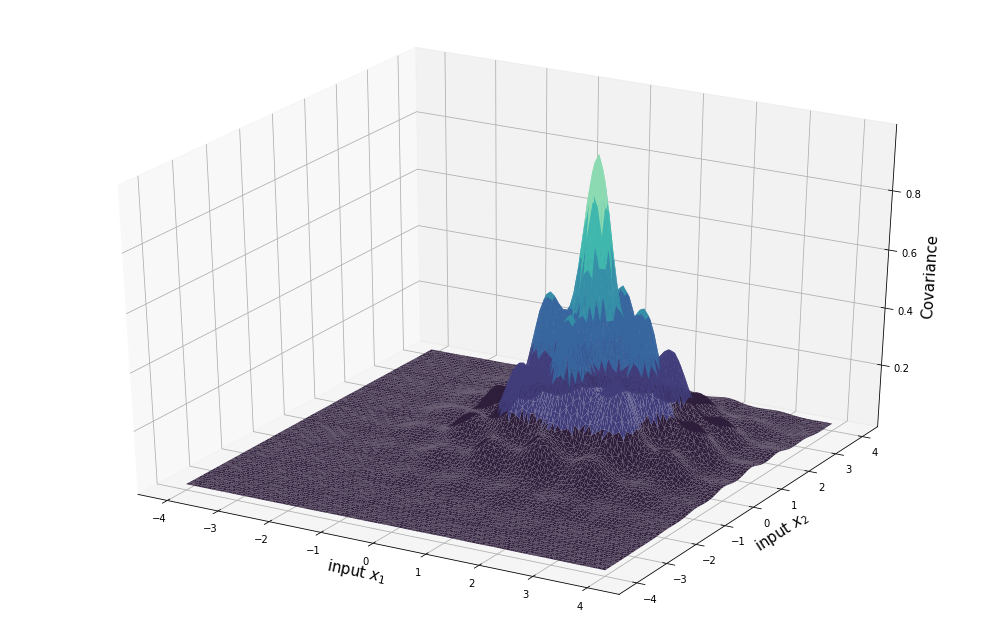

In [389]:
# plotting the initial kernel
plot_kern(k)

In [390]:
# specifying the model

m = GPy.models.GPRegression(Xtrain, Ytrain, k)

# Fix the Gaussian noise variance
m.Gaussian_noise.variance = 0.05
m.Gaussian_noise.variance.fix()

print(m)
#print(m.kern.lengthscale)


Name : GP regression
Objective : 79.4577509108957
Number of Parameters : 7
Number of Optimization Parameters : 6
Updates : True
Parameters:
  GP_regression.                |  value  |  constraints  |  priors
  mul.std_periodic.variance     |    1.0  |      +ve      |        
  mul.std_periodic.period       |    1.0  |      +ve      |        
  mul.std_periodic.lengthscale  |    1.0  |      +ve      |        
  mul.Mat32.variance            |    1.0  |      +ve      |        
  mul.Mat32.lengthscale         |   (2,)  |      +ve      |        
  Gaussian_noise.variance       |   0.05  |   +ve fixed   |        


In [391]:
# optimization
m.optimize()
m.optimize_restarts(10, robust=True)

print(m)

Optimization restart 1/10, f = 25.457886715598477
Optimization restart 2/10, f = 25.457878383765447
Optimization restart 3/10, f = 25.45787579126045
Optimization restart 4/10, f = 28.033871764641667
Optimization restart 5/10, f = 27.689263030545664
Optimization restart 6/10, f = 28.19235984471949
Optimization restart 7/10, f = 27.78110518955144
Optimization restart 8/10, f = 25.457880728398674
Optimization restart 9/10, f = 25.45787604565118
Optimization restart 10/10, f = 28.033872147515915

Name : GP regression
Objective : 25.45787579126045
Number of Parameters : 7
Number of Optimization Parameters : 6
Updates : True
Parameters:
  GP_regression.                |               value  |  constraints  |  priors
  mul.std_periodic.variance     |  1.9098415336682648  |      +ve      |        
  mul.std_periodic.period       |  0.5743750800390541  |      +ve      |        
  mul.std_periodic.lengthscale  |  0.2977425046862495  |      +ve      |        
  mul.Mat32.variance            |   0

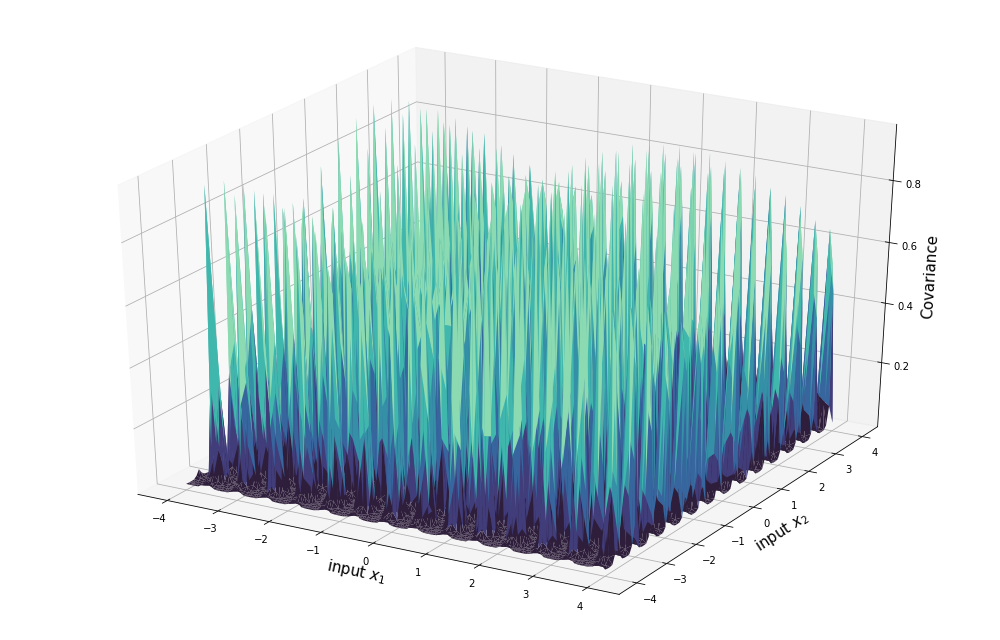

In [392]:
plot_kern(k)

In [393]:
# creating a grid
[Xi, Xj] = np.meshgrid(np.linspace(0, 1, 200), np.linspace(0, 1, 200)) #raise this in the final stage
# augmenting our grid to be a list of coordinates
Xnew = np.vstack((Xi.ravel(), Xj.ravel())).T # Change our input grid to list of coordinates

In [394]:
# calculate the mean and the covariance at the grid
mean, Cov = m.predict_noiseless(Xnew, full_cov=False)

GP_regression.,value,constraints,priors
mul.std_periodic.variance,1.9098415336682648,+ve,
mul.std_periodic.period,0.5743750800390541,+ve,
mul.std_periodic.lengthscale,0.2977425046862495,+ve,
mul.Mat32.variance,0.501778335387665,+ve,
mul.Mat32.lengthscale,"(2,)",+ve,
Gaussian_noise.variance,0.05,+ve fixed,


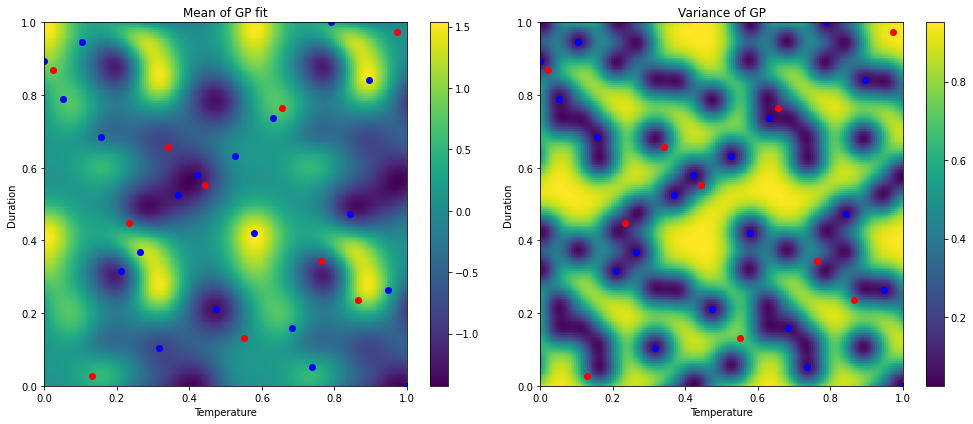

In [395]:
# plotting environment
plt.figure(figsize=(14, 6))

# left plot - mean of gp fit
plt.subplot(121)

# mean surface
plt.pcolor(Xi, Xj, mean.reshape(Xi.shape)) #contour

# sample locations
plt.plot(Xtrain[:, 0], Xtrain[:, 1], 'o', color='blue') #, plt.axis("square")
plt.plot(Xtest[:,0], Xtest[:,1], 'o', color='red')

# annotations
plt.xlabel("Temperature"), plt.ylabel("Duration")
plt.title("Mean of GP fit"), plt.colorbar()

# right plot - variance of the gp
plt.subplot(122)

# variance surface
plt.pcolor(Xi, Xj, Cov.reshape(Xi.shape))

# sample locations
plt.plot(Xtrain[:,0], Xtrain[:,1], 'o', color='blue')#, plt.axis("square")
plt.plot(Xtest[:,0], Xtest[:,1], 'o', color='red')

# annotations
plt.xlabel("Temperature"), plt.ylabel("Duration")
plt.title("Variance of GP"), plt.colorbar()

plt.tight_layout()
#plt.show()

m

### Extra

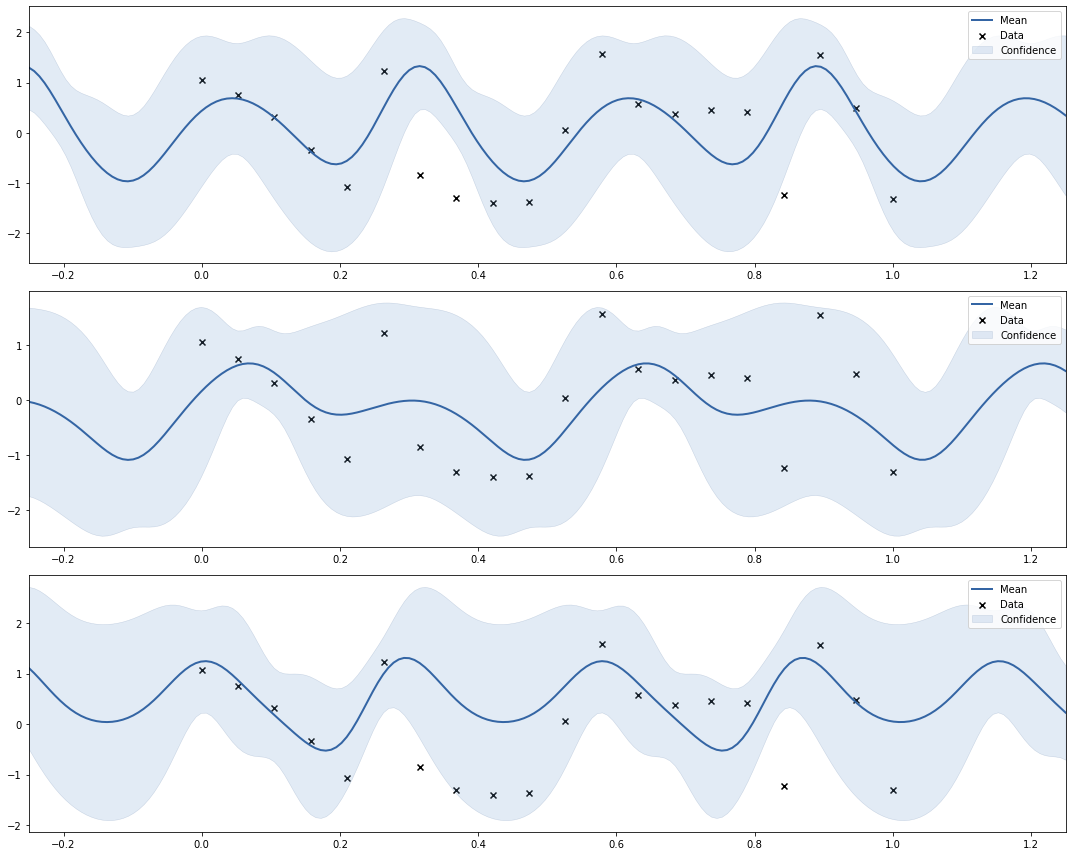

In [396]:
slices = [0.25, 0.75, 1.5]
figure = GPy.plotting.plotting_library().figure(3, 1, figsize=(15,12))

for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(1, y)], row=(i+1), plot_data=True)

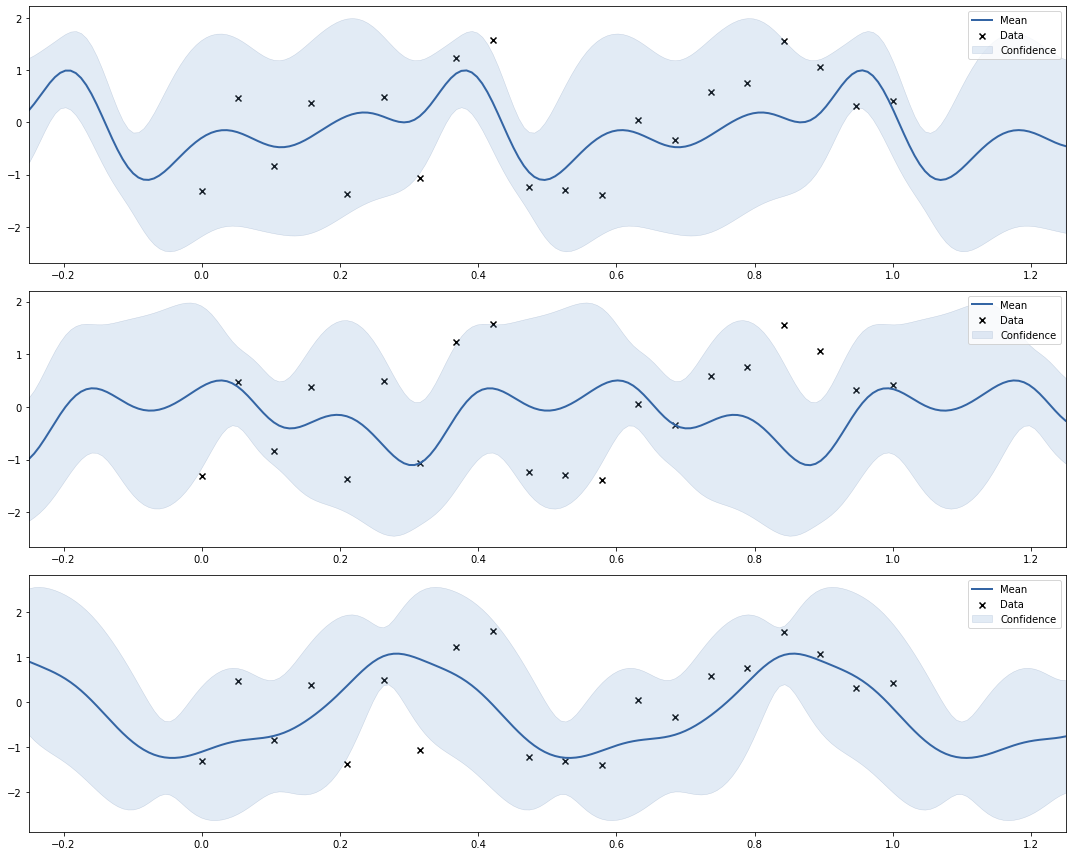

In [397]:
slices = [0.25, 0.75, 1.5]
figure = GPy.plotting.plotting_library().figure(3, 1, figsize=(15,12))

for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(0, y)], row=(i+1), plot_data=True)

In [306]:
def plot_gp(X, m, C, training_points=None):
    """ Plotting utility to plot a GP fit with 95% confidence interval """
    # Plot 95% confidence interval 
    plt.fill_between(X[:,0],
                     m[:,0] - 1.96*np.sqrt(np.diag(C)),
                     m[:,0] + 1.96*np.sqrt(np.diag(C)),
                     alpha=0.5)
    # Plot GP mean and initial training points
    plt.plot(X, m, "-")
    plt.legend(labels=["GP fit"])
    
    plt.xlabel("X"), plt.ylabel("Function")
    
    # Plot training points if included
    if training_points is not None:
        X_, Y_ = training_points
        plt.plot(X_, Y_, "kx", mew=2)
        plt.legend(labels=["GP fit", "sample points"])

In [379]:
plt.figure(figsize=(12, 5))

# Plot the GP fit mean and covariance
plot_gp(Xnew, m, Cov) #,training_points=(Xtrain[:,0], Ytrain))
plt.title("Regression Model Fit")

IndexError: too many indices for array

<Figure size 864x360 with 0 Axes>

In [ ]:
# Compare kernels

In [ ]:
# Metrics

In [ ]:
# Slices